<hr size="8" color="blue">
<p style="text-align: center;"><span style="color: #0000ff;"><font size="+15"><strong> Simulations
 </strong> </font></span> </p>
<hr size="8" color="blue">

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

# Import des libraires

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

# 1. Définition des paramètres du signal

## a) Fréquence d'échantillonnage


In [2]:
FREQ=5*60
FREQ

300

Il y a N point et l'intervalle entre chaque point est de T

T correspond à la fréquence freq 

In [3]:
#Notre base de travail, que nous appelons période, est une journée

PeriodeRef=3600*24 #seconde
Te=5*60 # seconde
#Nombre de points sur 5 jour
Ne= 5*int(PeriodeRef/Te)
Ne

1440

In [4]:
T=PeriodeRef/(Te*3)
T

96.0

## b) Index de temps

In [5]:
time=np.arange(start=0.0,stop=Ne*T,step=T)
time.shape

(1440,)

In [6]:
dates=pd.date_range(start='1/1/2018 23:10', periods=Ne, freq='5min')

# 2) La saisonnalités du signal

On veut qu'il y ai trois cycle par jour, ce qui fait un total de 15 cycles sur 5 jours

In [7]:
CycleParPeriode=3


In [8]:
Fr=CycleParPeriode/PeriodeRef
Fr

3.472222222222222e-05

https://zestedesavoir.com/tutoriels/2451/les-signaux-sinusoidaux-en-physique/dephasage-et-retard/

In [9]:
Delay=4081#s
phase=Delay*(2*np.pi*Fr)
PeriodeRef=3600*24 #seconde
CycleParPeriode=3
Te=5*60 # seconde
Ne= 5*int(PeriodeRef/Te)
time=np.arange(Ne*Te,step=Te)
Fr=CycleParPeriode/PeriodeRef
print(Fr)
phase=np.pi-0.02
seasonality=np.sin(Fr*2*np.pi*time+phase)
#plt.plot(time,seasonality)
dt=Ne/time.shape[0]*Te
TT=int(1/(Fr*dt))#
print(phase)

3.472222222222222e-05
3.121592653589793


In [10]:
import numpy as np
import pylab as pl

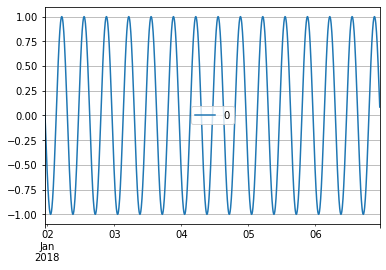

In [11]:
from scipy import signal
import pandas as pd
dfs = pd.DataFrame(seasonality[:, np.newaxis])
dfs.index = dates
dfs.plot()
#dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()

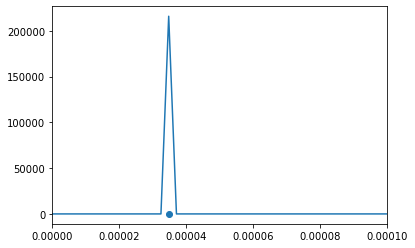

In [12]:
Fe=1/Te

f, Pxx_den = signal.periodogram(dfs.values[:,0],Fe)
plt.plot(f,Pxx_den)
plt.xlim([0,0.0001])
plt.scatter([Fr],[0])

reel : 3.122

Rest : 1.551
Div : 0
Estimation brutes 1.551

Estimation affiner: 3.122
Ecart : -1.7763568394002505e-15
14308.326752779067


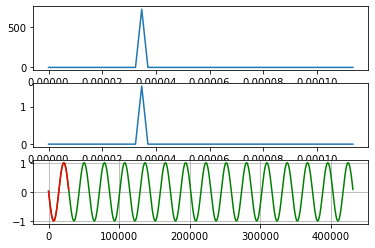

In [13]:
amp = np.fft.rfft(seasonality)#+np.pi/2
freqs = np.fft.rfftfreq(time.shape[-1],dt)
mag=np.abs(amp)
#mag=np.sqrt(amp.real**2+amp.imag**2)
pha=np.angle(amp)
#pha=np.arctan2(amp.imag,amp.real)
#pha[abs(mag)<1]=0
print('reel : '+str(np.around(phase,3))+'\n')
#PHA=max(abs(pha))
IndFR=np.argmax(mag)
Pe=np.pi
PHA=pha[IndFR]
PhaMod=PHA%Pe
PhaDiv=int(PHA//Pe)
print("Rest : "+str(np.around(PhaMod,3)))
print("Div : "+str(PhaDiv))
print('Estimation brutes '+str(np.around(PHA,3))+'\n')
#print(PHA>np.pi/2)
'''if((PHA>np.pi+0.001) or (PHA<0)):
    print(">")
    PHA=PHA+np.pi'''
PHA=PhaMod+PhaDiv*np.pi+np.pi/2
#print (PHA)
print('Estimation affiner: '+str(np.around(PHA,3)))
print('Ecart : '+str(PHA-phase))
M=max(mag)
phaPlot=pha
phaPlot[np.abs(mag) < M-1] = 0
DelayEst=phase/(2*np.pi*Fr)
print(DelayEst)
pl.subplot(311)
pl.plot(freqs[:50],mag[:50])
pl.subplot(312)
pl.plot(freqs[:50],phaPlot[:50])
pl.subplot(313)
pl.plot(time, seasonality,'g')
pl.plot(time[:TT], seasonality[:TT],'r')
pl.grid()
pl.show()

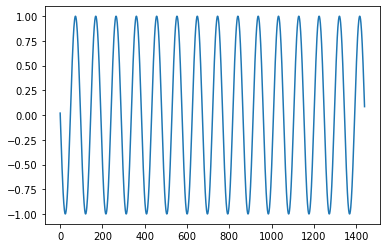

In [14]:
plt.plot(seasonality)

In [15]:
TT

96

# Test

In [16]:
Fr=CycleParPeriode/(24*3600)
Fr

3.472222222222222e-05

phase = np.pi / 24
phase

In [17]:
periode=60#24*3600#max(2.0*np.pi*x)
phase=periode/3#*(3600*24)
phase=20/(24*3600)
phase

0.0002314814814814815

<AxesSubplot:>

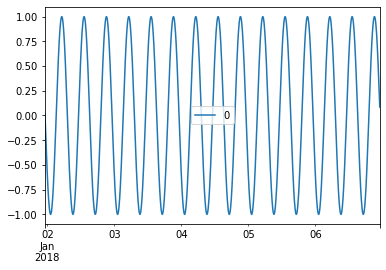

In [18]:
from scipy import signal
import pandas as pd
dfs = pd.DataFrame(seasonality[:, np.newaxis])
dfs.index = dates
dfs.plot()

# Fin

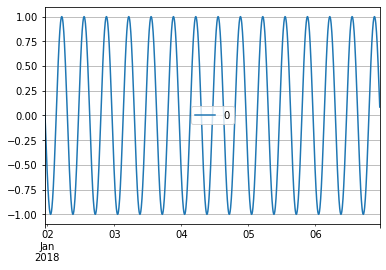

In [19]:
dfS=pd.DataFrame(seasonality[:,np.newaxis])
dfS.index = dates
dfS.plot()
#dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()
dfS.to_csv('SimulatedSinus.csv')

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

phase = np.pi / 4
print(phase)
t = np.linspace(0, 10, num=200, endpoint=False)
y = np.cos(2 * np.pi * t + phase)

0.7853981633974483


In [21]:
seasonalityPeriode=seasonality[0:int(T)]

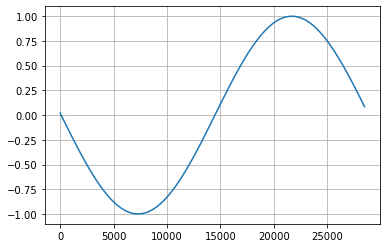

In [22]:
plt.plot(time[0:int(T)],seasonalityPeriode)
plt.grid()

In [23]:
Overtime=np.arange(Ne*Te,step=Te/100)


In [24]:
seasonalityI=np.interp(Overtime,time, seasonality)

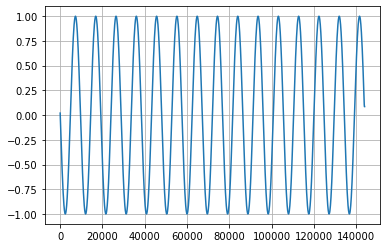

In [25]:
plt.plot(seasonalityI)
plt.grid()

In [26]:
from scipy import signal 
hamming = signal.hamming(seasonalityI.shape[0])

In [27]:
seasonalityI=seasonalityI*hamming

https://stackoverflow.com/questions/54454723/scipy-fft-how-to-get-phase-angle/54466750

In [28]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# Processus stationnaire

In [29]:
from statsmodels.tsa.arima.model import ARIMA

In [30]:
Ns=seasonality.shape[0]
Ns

1440

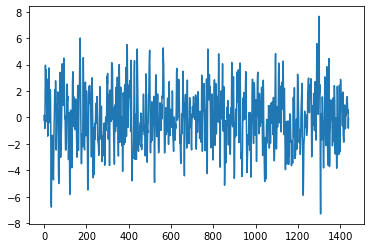

In [62]:
import numpy as np
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma,Ns)
plt.plot(y)
plt.show()


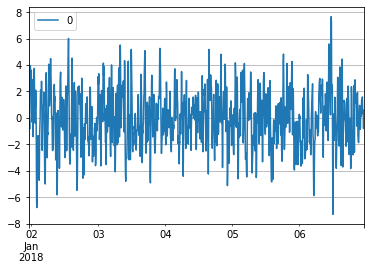

In [63]:
%matplotlib inline
dfSta = pd.DataFrame(y[:, np.newaxis])
dfSta.index = dates
dfSta.plot()
#dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()
dfSta.to_csv('SimulatedStationnaire.csv')

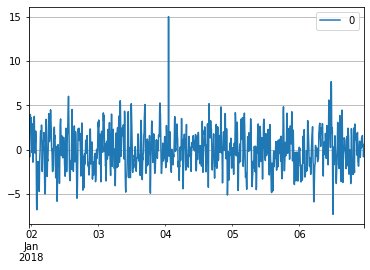

In [67]:
%matplotlib inline
y1=np.copy(y)
dfOutlier = pd.DataFrame(y1[:, np.newaxis])
dfOutlier.iloc[600,0]=15
dfOutlier.index = dates
dfOutlier.plot()
plt.grid()
dfOutlier.to_csv('SimulatedOutlier.csv')

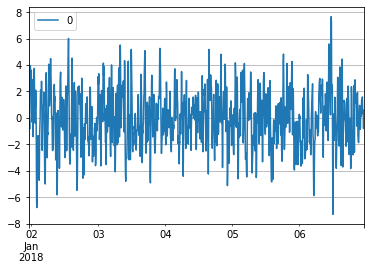

In [69]:
dfARMA = pd.DataFrame(y[:, np.newaxis])
dfARMA.index = dates
dfARMA.plot()
#dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()
dfARMA.to_csv('SimulatedARMA.csv')

In [68]:
dfOutlier

,0
2018-01-01 23:10:00,-0.204708
2018-01-01 23:15:00,0.192353
2018-01-01 23:20:00,-0.084332
2018-01-01 23:25:00,-0.837072
2018-01-01 23:30:00,0.816031
...,...
2018-01-06 22:45:00,0.310997
2018-01-06 22:50:00,0.602746
2018-01-06 22:55:00,0.333001
2018-01-06 23:00:00,-0.806774


# Tendance

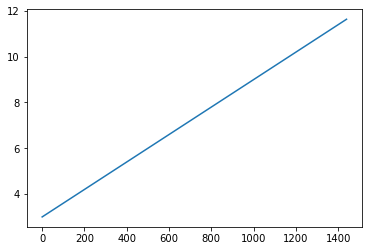

In [36]:
trend=0.00002*time+3
#seasonality=4 + 2 * np.sin(200 * x)
plt.plot(trend)

Fréquence neterme de minutes

In [70]:
Data=trend+seasonality+0.3*y

In [71]:
DataSea=seasonality+0.5*y

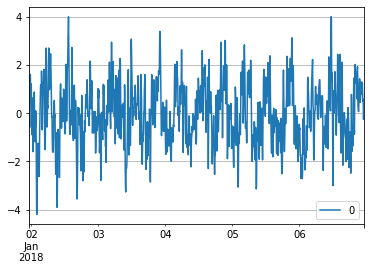

In [72]:
dfSea = pd.DataFrame(DataSea[:, np.newaxis])
dfSea.index = dates
dfSea.plot()
#dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()

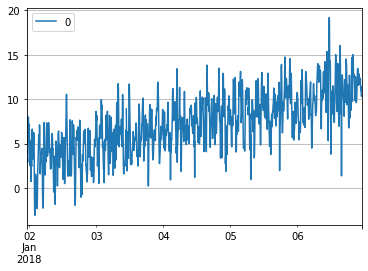

In [98]:
trendEval1=0.00002*time+3
seasonalityEval1=np.sin(4*Fr*2*np.pi*time+0)
y2=np.copy(y)
y3=y2+trendEval1+seasonalityEval1
import random 
for i in range(10):
    p=int(random.random()*y2.shape[0])
    y3[p,]=random.random()*15
for i in range(3):
    p=int(random.random()*y2.shape[0])
    y3[p,]=np.nan
dfEval1 = pd.DataFrame(y3[:, np.newaxis])
dfEval1.index = dates
dfEval1.plot()
plt.grid()
dfEval1.to_csv('SimulatedEval1.csv')

In [73]:
dfSea.to_csv('SimulatedSeasonality.csv')

In [74]:
DataTrend=trend+0.3*y

<AxesSubplot:>

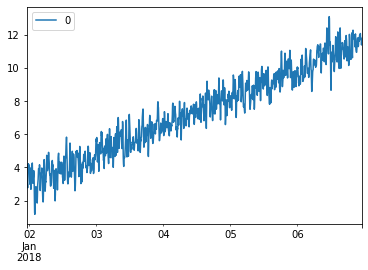

In [75]:
dfTrend = pd.DataFrame(DataTrend[:, np.newaxis])
dfTrend.index = dates
dfTrend.plot()

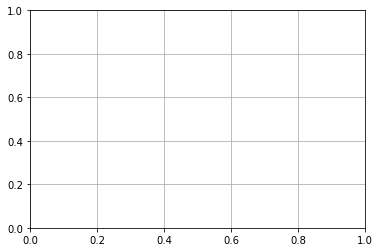

In [76]:
#dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()

In [77]:
dfTrend.to_csv('SimulatedTrend.csv')

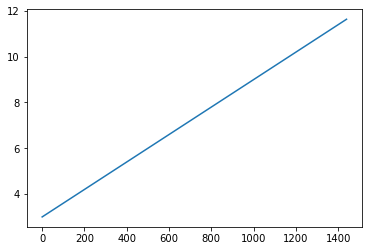

In [78]:
plt.plot(trend)

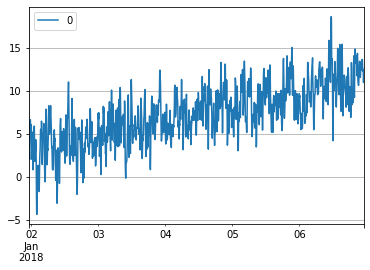

In [79]:
dfD1 = pd.DataFrame(y+trend+seasonality)
dfD1.index = dates
dfD1.plot()
#dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()
dfD1.to_csv('SimulatedTrendSaisonality.csv')

In [47]:
DataRelation=trend+seasonality+0.3*y
noise = np.random.normal(0, 1, DataRelation.shape)
DataRelation = DataRelation# + 0.1*noise

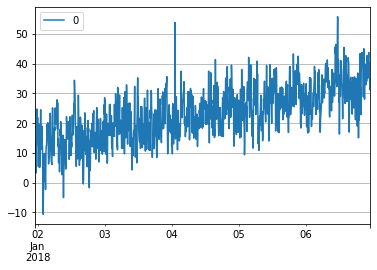

In [48]:
noise = np.random.normal(0, 1,y.shape)
dfD2 = pd.DataFrame(2.5*(y+trend+seasonality)+5+3*noise)
                 
dfD2.index = dates
dfD2.plot()
#dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()
dfD2.to_csv('SimulatedTrendSaisonalityRelation.csv')

In [49]:

import pandas as pd
df = pd.DataFrame(Data[:, np.newaxis])
#df.index = dates2

Ajout aléatoire de nan

In [50]:
for col in df.columns:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

Ajout de valeur erroné

In [51]:
import string
import random

def GenString():
    length_of_string = 8
    return(''.join(random.SystemRandom().choice(string.ascii_letters + string.digits) for _ in range(length_of_string)))
GenString()

'oeOlTGdd'

In [52]:
for col in df.columns:
    df.loc[df.sample(frac=0.01).index, col] = GenString()

A interpoler

In [53]:
df=df.interpolate(method='linear')
df.plot()

TypeError: Cannot interpolate with all object-dtype columns in the DataFrame. Try setting at least one column to a numeric dtype.

In [ ]:
df

In [ ]:
df.to_csv('Simulated.csv')

In [ ]:
model = ARIMA(y, order=(2,0,2))
model_fit = model.fit()

In [ ]:
model_fit.summary()

# Lien

In [ ]:
dd=df.values[:,0]
dd.shape

In [ ]:
Data2=4*dd+2
plt.plot(Data2)
Data2

In [ ]:
import warnings
z = np.polyfit(dd,Data2,1)
z

In [ ]:
p = np.poly1d(z)
plt.plot(time,p(time))

# Cycle

In [ ]:
Cycle=np.sin(Fr*2*np.pi*time+phase)+np.sin(3/2*Fr*2*np.pi*time+phase)

In [ ]:
plt.plot(Cycle)

In [ ]:
Cor=np.correlate(Cycle,Cycle,"full")

NC=Cor.shape[0]

In [ ]:
plt.plot(time,Cor[NN-1:],'r')

In [ ]:
time.shape

Ajout d'une composante cyclique 

In [ ]:
NN=int(NC/2)+1